<a href="https://colab.research.google.com/github/kamikahughes/ANA500_2022/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [5]:
from sklearn.datasets import load_digits

In [6]:
digits = load_digits()

In [7]:
import sklearn.neighbors

In [ ]:
#explore data

In [8]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [9]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

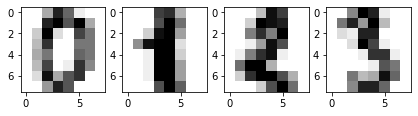

In [11]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(7, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r)

In [12]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [13]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [21]:
df = pd.DataFrame(digits.data,columns=digits.feature_names)

In [22]:
x = digits.data
y = digits.target

In [23]:
df['target']= digits.target
df.head(40)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [25]:
clf_model = SVC(C=13)
clf_model.fit(X_train, y_train)

SVC(C=13)

In [30]:
clf_predict = clf_model.predict(X_test)

In [43]:
clf_report = metrics.classification_report(y_test, clf_predict, output_dict=True)
svc_model = pd.DataFrame(clf_report).transpose()
svc_model

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,38.000000
1,0.971429,1.000000,0.985507,34.000000
2,1.000000,1.000000,1.000000,35.000000
3,1.000000,1.000000,1.000000,33.000000
4,1.000000,1.000000,1.000000,40.000000
5,1.000000,0.972973,0.986301,37.000000
6,0.974359,1.000000,0.987013,38.000000
7,0.970588,0.970588,0.970588,34.000000
8,1.000000,0.967742,0.983607,31.000000
9,0.975000,0.975000,0.975000,40.000000


In [44]:
#KNN

In [45]:
clf = KNeighborsClassifier(n_neighbors=9,leaf_size=30)

In [47]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [49]:
predicted_KNN = clf.predict(X_test)

In [50]:
report = metrics.classification_report(y_test, predicted_KNN, output_dict=True)
model_k = pd.DataFrame(report).transpose()
model_k

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,38.000000
1,0.918919,1.000000,0.957746,34.000000
2,0.971429,0.971429,0.971429,35.000000
3,1.000000,0.969697,0.984615,33.000000
4,0.975000,0.975000,0.975000,40.000000
5,0.972973,0.972973,0.972973,37.000000
6,0.973684,0.973684,0.973684,38.000000
7,0.944444,1.000000,0.971429,34.000000
8,0.964286,0.870968,0.915254,31.000000
9,1.000000,0.975000,0.987342,40.000000


In [52]:
#NBC

In [53]:
clf = GaussianNB(var_smoothing=1e-03)
clf.fit(X_train,y_train)
predicted_NBC = clf.predict(X_test)

In [54]:
report = metrics.classification_report(y_test, predicted_NBC, output_dict=True)
model_nbc = pd.DataFrame(report).transpose()
model_nbc

,precision,recall,f1-score,support
0,1.000000,0.947368,0.972973,38.000000
1,0.821429,0.676471,0.741935,34.000000
2,0.933333,0.800000,0.861538,35.000000
3,0.875000,0.848485,0.861538,33.000000
4,0.928571,0.975000,0.951220,40.000000
5,0.918919,0.918919,0.918919,37.000000
6,0.971429,0.894737,0.931507,38.000000
7,0.916667,0.970588,0.942857,34.000000
8,0.622222,0.903226,0.736842,31.000000
9,0.846154,0.825000,0.835443,40.000000


In [55]:
#CM

In [61]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
CM = confusion_matrix(y_test, predicted_NBC)
CM_display = ConfusionMatrixDisplay(confusion_matrix=CM)

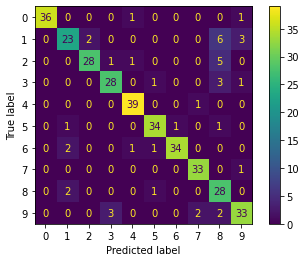

In [62]:
CM_display.plot()

In [66]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
CM_KNN = confusion_matrix(y_test, predicted_KNN)
KNN_CM_display = ConfusionMatrixDisplay(confusion_matrix=CM_KNN)

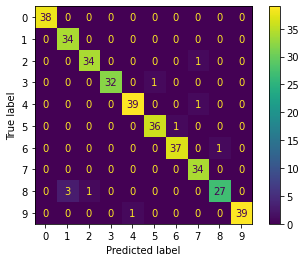

In [67]:
KNN_CM_display.plot()

In [68]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
CM_CLF = confusion_matrix(y_test, clf_predict)
CLF_CM_display = ConfusionMatrixDisplay(confusion_matrix=CM_CLF)

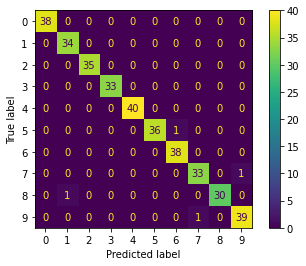

In [69]:
CLF_CM_display.plot()

In [71]:
#SVM had the highest levels of correct prediction, although KNN had a high level of accuracy as well. Either would work when we want high accuracy.